In [6]:
%matplotlib inline
import pandas as pd
import os

In [7]:
runnum = 10
endyear = 2021
h5_location = './../runs/run{}.h5'.format(runnum)

In [8]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [9]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [10]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [11]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [12]:
total

,2016,2017,2018,2019,2020,2021
5,95,28,21,12,50,27.0
3,637,309,376,123,3086,NaN
125,2157,1260,969,776,8285,130.0
99,474,309,221,296,7231,NaN
161,490,508,676,430,1008,1069.0
115,178,29,4,11,834,NaN
147,211,78,43,15,199,NaN
93,659,356,272,124,1871,NaN


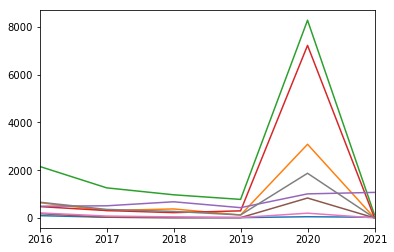

In [13]:
for l in lids:
    total.fillna(0).loc[l].plot()

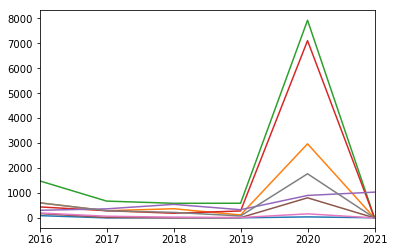

In [14]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot()

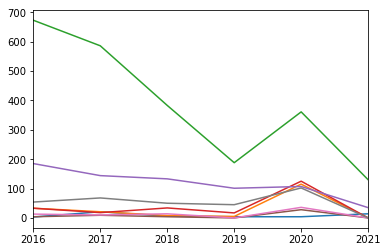

In [15]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot()

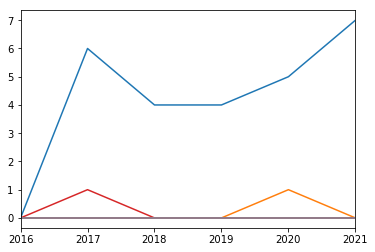

In [16]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot()

In [18]:
b2020 = store['2020/buildings']

In [26]:
b2020.year_built.value_counts(sort=False)

0       379127
1644         2
1656         2
1690         1
1760         1
1780         2
1790         5
1791         1
1795         4
1800       214
1803         8
9999        19
1805         2
1806         2
1807         1
1808         8
1810        22
1811         8
1812         1
1813         1
1814         1
1816         2
1818         5
1819         5
1820        42
1821        16
1822        22
1823        15
1824         8
1825        19
         ...  
1991     13876
1992     13817
1993     14133
1994     16237
1995     17127
1996     18992
1997     19434
1998     20318
1999     19952
2000     19960
2001     16679
2002     16135
2003     16194
2004     15421
2005     13436
2006      7672
2007      4181
2008       316
2009       192
2010      2330
2011      3034
2012      4285
2013      5711
2014      5056
2015      5145
2016      4901
2017      2877
2018      2582
2019      1787
2020     22564
Name: year_built, Length: 225, dtype: int64